# Análisis de datos de los dramas coreanos

## Configuración de el entorno de trabajo

Importación de las librerías necesarias.

1. pandas: para el manejo de los datos.
2. missingno: para visualizar los datos faltantes.
3. rich: para mostrar los datos de una forma más bonita.

In [1]:
import pandas as pd
import missingno as msno
from rich import print

Correr la extensión de pandas para poder manejar los datos faltantes.

In [2]:
%run "../pandas_extensions/missing.py"

## Importación de los datos

Al examinar los datos con el siguiente código:

```python
l = k_dramas[k_dramas.missing_data.columns_without_na[0]].unique()
l.sort()
l
```

se determinó que los datos faltantes se representan con '99999' en las columnas 'rank' y 'pop' y 'Not Yet Rated' en la columna 'content_rt'. Además, como en las columnas 'type' y 'country' solo contenían los valores de 'Drama' y 'South Korea' respectivamente, se decidió eliminarlas. También se eliminó la columna 'kdrama_id' porque la columna de 'drama_name' podía cumplir la misma función y hacía más fácil la lectura de los datos.

In [3]:
k_dramas: pd.DataFrame = (
    pd.read_csv(
        './../data/csv/korean_drama.csv',
        na_filter=True,
        na_values=[99999, 'Not Yet Rated']
    )
    .drop(columns=['type', 'country', 'kdrama_id'])
)
k_dramas.set_index('drama_name', inplace=True)
k_dramas.head()

,year,director,screenwriter,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
drama_name,,,,,,,,,,,,,
Sing My Crush,2023,['So Joon Moon'],NaN,8,1500.0,"Aug 2, 2023","Aug 2, 2023",Wednesday,NaN,NaN,Follow the story of acquaintances Ba Ram and H...,1484.0,2238.0
D.P. Season 2,2023,NaN,['Kim Bo Tong'],6,3000.0,"Jul 28, 2023","Jul 28, 2023",Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164.0,1084.0
Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",8,3300.0,2023-07-05,2023-07-26,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443.0,6915.0
To Be Honest,2023,NaN,NaN,3,600.0,2023-06-30,2023-07-14,Friday,NaN,NaN,Don't you have those days where the whole univ...,49895.0,NaN
Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],12,2700.0,"Jun 30, 2023","Jun 30, 2023",Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826.0,547.0


Echando un vistazo rápido al conjunto de datos, se puede ver que la minoría de columnas son numéricas. Sin contar la columna de drama_name, se tienen 1752 registros y 13 columnas en total para analizar. De estar 13 columnas solo 4 no contienen ningún valor faltante. Las columnas sin datos faltantes son: 'year', 'tot_eps', 'start_dt', 'end_dt'. Las columnas con datos faltantes son: 'director', 'screenwriter', 'duration', 'aired_on', 'org_net', 'content_rt', 'synopsis', 'rank', 'pop'. Y no se encontró ningún tipo de relación entre el tipo de dato de la columna con si tienen datos faltantes o no.

In [4]:
k_dramas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1752 entries, Sing My Crush to Crow Building
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1752 non-null   int64  
 1   director      1036 non-null   object 
 2   screenwriter  959 non-null    object 
 3   tot_eps       1752 non-null   int64  
 4   duration      1728 non-null   float64
 5   start_dt      1752 non-null   object 
 6   end_dt        1752 non-null   object 
 7   aired_on      1520 non-null   object 
 8   org_net       1344 non-null   object 
 9   content_rt    1210 non-null   object 
 10  synopsis      1584 non-null   object 
 11  rank          1677 non-null   float64
 12  pop           1421 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 191.6+ KB


In [5]:
print(f'k-dramas has {k_dramas.shape[0]} rows and {k_dramas.shape[1]} columns')

k-dramas has 1752 rows and 13 columns

In [6]:
print(f'The columns of k-dramas dataframe are {list(k_dramas.columns)}')

The columns of k-dramas dataframe are ['year', 'director', 'screenwriter', 'tot_eps', 'duration', 'start_dt', 
'end_dt', 'aired_on', 'org_net', 'content_rt', 'synopsis', 'rank', 'pop']

In [7]:
k_dramas.missing_data.columns_without_na

Index(['year', 'tot_eps', 'start_dt', 'end_dt'], dtype='object')

In [8]:
k_dramas[k_dramas.missing_data.columns_without_na].dtypes

year         int64
tot_eps      int64
start_dt    object
end_dt      object
dtype: object

In [9]:
k_dramas.missing_data.columns_with_na

Index(['director', 'screenwriter', 'duration', 'aired_on', 'org_net',
       'content_rt', 'synopsis', 'rank', 'pop'],
      dtype='object')

In [10]:
k_dramas[k_dramas.missing_data.columns_with_na].dtypes

director         object
screenwriter     object
duration        float64
aired_on         object
org_net          object
content_rt       object
synopsis         object
rank            float64
pop             float64
dtype: object

## Análisis Exploratorio de Datos Faltantes

Se puede ver que la mayoría de columnas no tienen ningún valor faltante.

Pero las dos columnas con mayor número de valores faltantes son: 'director' y 'screenwriter'. La cantidad de valores faltantes en estas dos columnas son similares, así que más adelante se analizarán si tienen algún tipo de relación.

De allí la columna con más valores faltantes es 'org_net', con aproximadamente la mitad de valores faltantes que las dos anteriores.

Luego se encuentra la columna 'aired_on', con nuevamente la mitad de valores faltantes que la anterior.

En el caso de la columnas 'synopsis' pasa algo similar

Y finalmente, la columna con menos valores faltantes es 'duration', con solo 24 valores faltantes. Así que las filas con valores faltantes en esta columna es posible que se puedan eliminar.

### Valores faltantes

In [11]:
k_dramas.missing_data.total_count_na

3289

In [12]:
k_dramas.missing_data.total_count_na_percentage

14.440639269406393

In [13]:
k_dramas.missing_data.total_count_not_na

19487

In [14]:
k_dramas.missing_data.total_count_not_na_percentage

85.5593607305936

-----

### Valores faltantes por columna

In [15]:
k_dramas.missing_data.count_na_per_column

year              0
director        716
screenwriter    793
tot_eps           0
duration         24
start_dt          0
end_dt            0
aired_on        232
org_net         408
content_rt      542
synopsis        168
rank             75
pop             331
dtype: int64

In [16]:
k_dramas.missing_data.count_na_per_column_percentage

year             0.000000
director        40.867580
screenwriter    45.262557
tot_eps          0.000000
duration         1.369863
start_dt         0.000000
end_dt           0.000000
aired_on        13.242009
org_net         23.287671
content_rt      30.936073
synopsis         9.589041
rank             4.280822
pop             18.892694
dtype: float64

In [17]:
k_dramas.missing_data.count_na_per_column.sort_values(ascending=False)

screenwriter    793
director        716
content_rt      542
org_net         408
pop             331
aired_on        232
synopsis        168
rank             75
duration         24
year              0
tot_eps           0
start_dt          0
end_dt            0
dtype: int64

In [18]:
k_dramas.missing_data.count_na_per_column_percentage.sort_values(ascending=False)

screenwriter    45.262557
director        40.867580
content_rt      30.936073
org_net         23.287671
pop             18.892694
aired_on        13.242009
synopsis         9.589041
rank             4.280822
duration         1.369863
year             0.000000
tot_eps          0.000000
start_dt         0.000000
end_dt           0.000000
dtype: float64

In [19]:
k_dramas.missing_data.na_count_and_percentage_per("column")

,count,percentage
year,0,0.000000
director,716,40.867580
screenwriter,793,45.262557
tot_eps,0,0.000000
duration,24,1.369863
start_dt,0,0.000000
end_dt,0,0.000000
aired_on,232,13.242009
org_net,408,23.287671
content_rt,542,30.936073


In [20]:
k_dramas.missing_data.na_count_and_percentage_per("column").sort_values(by="count", ascending=False)

,count,percentage
screenwriter,793,45.262557
director,716,40.867580
content_rt,542,30.936073
org_net,408,23.287671
pop,331,18.892694
aired_on,232,13.242009
synopsis,168,9.589041
rank,75,4.280822
duration,24,1.369863
year,0,0.000000


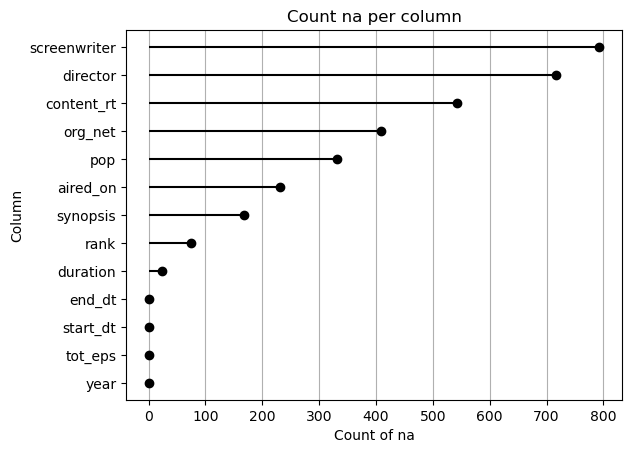

In [21]:
k_dramas.missing_data.plot_of_na_count_per_column()

<Axes: >

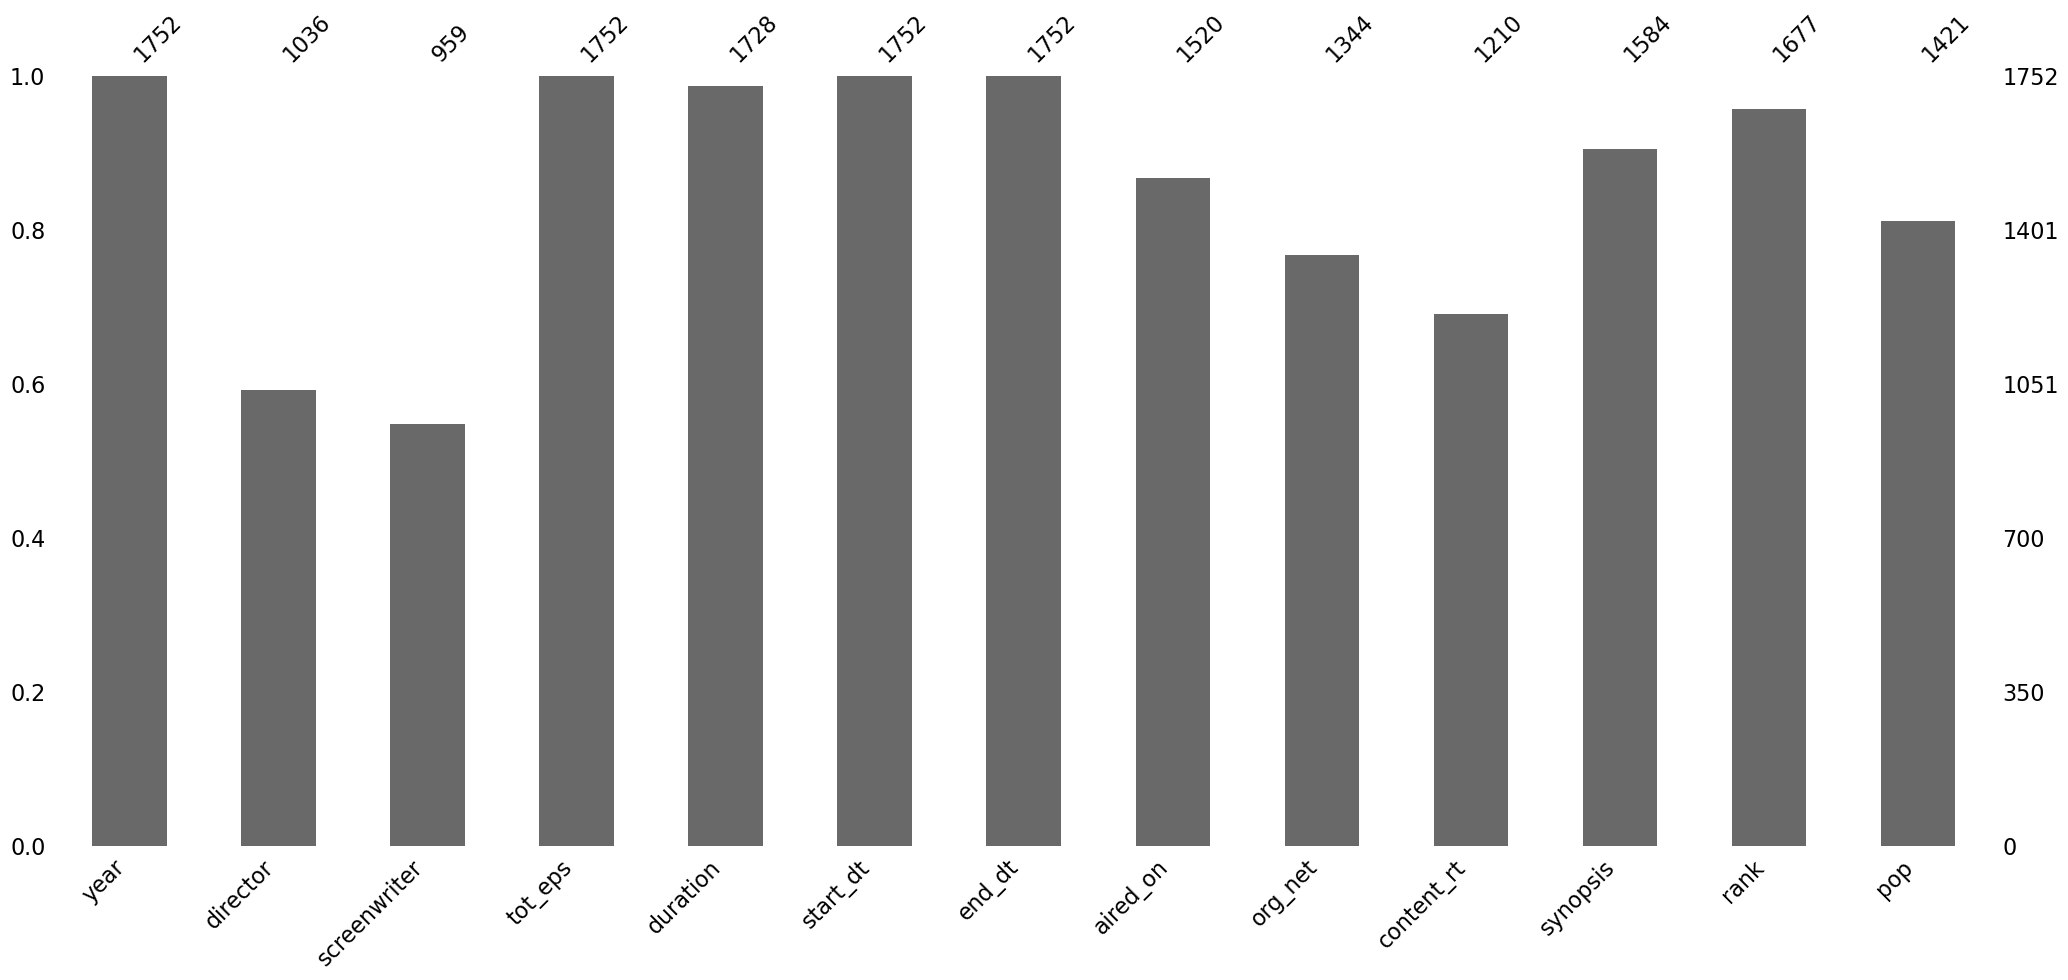

In [22]:
msno.bar(k_dramas)

<Axes: >

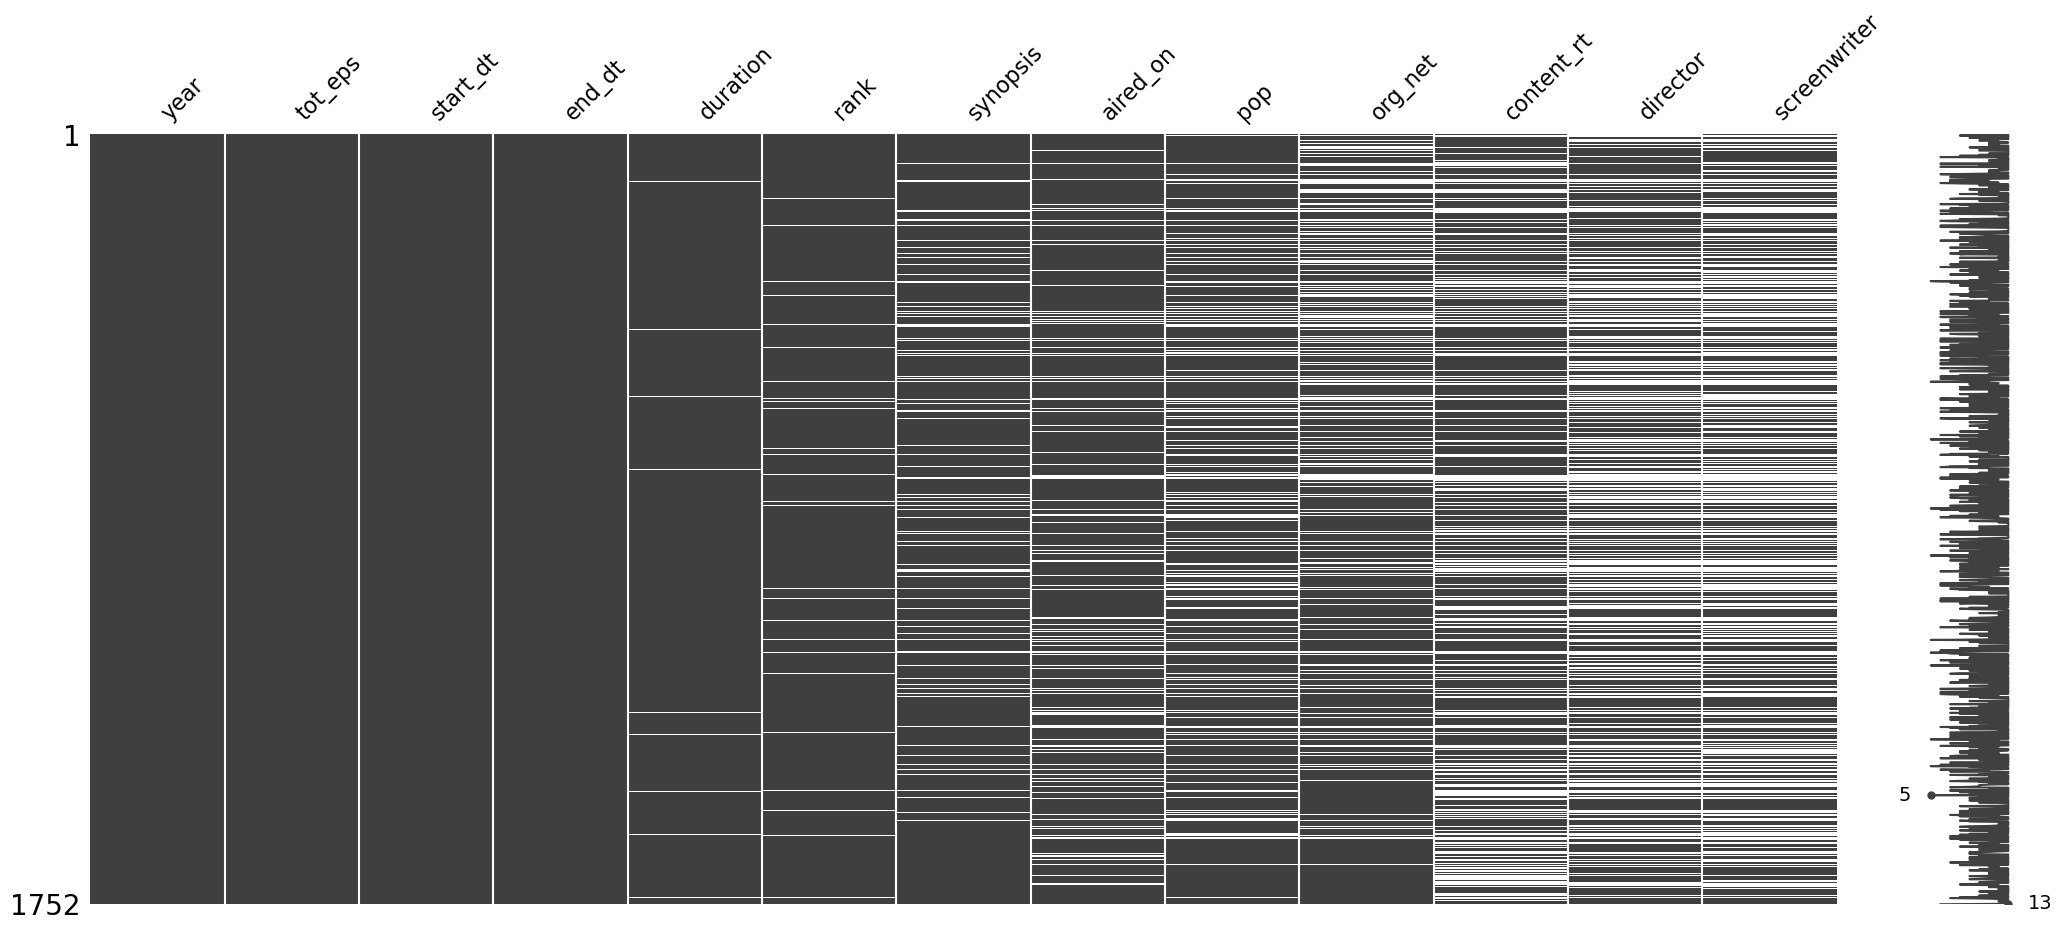

In [23]:
msno.matrix(df=k_dramas.missing_data.df_sorted_by_na_count())

<Axes: >

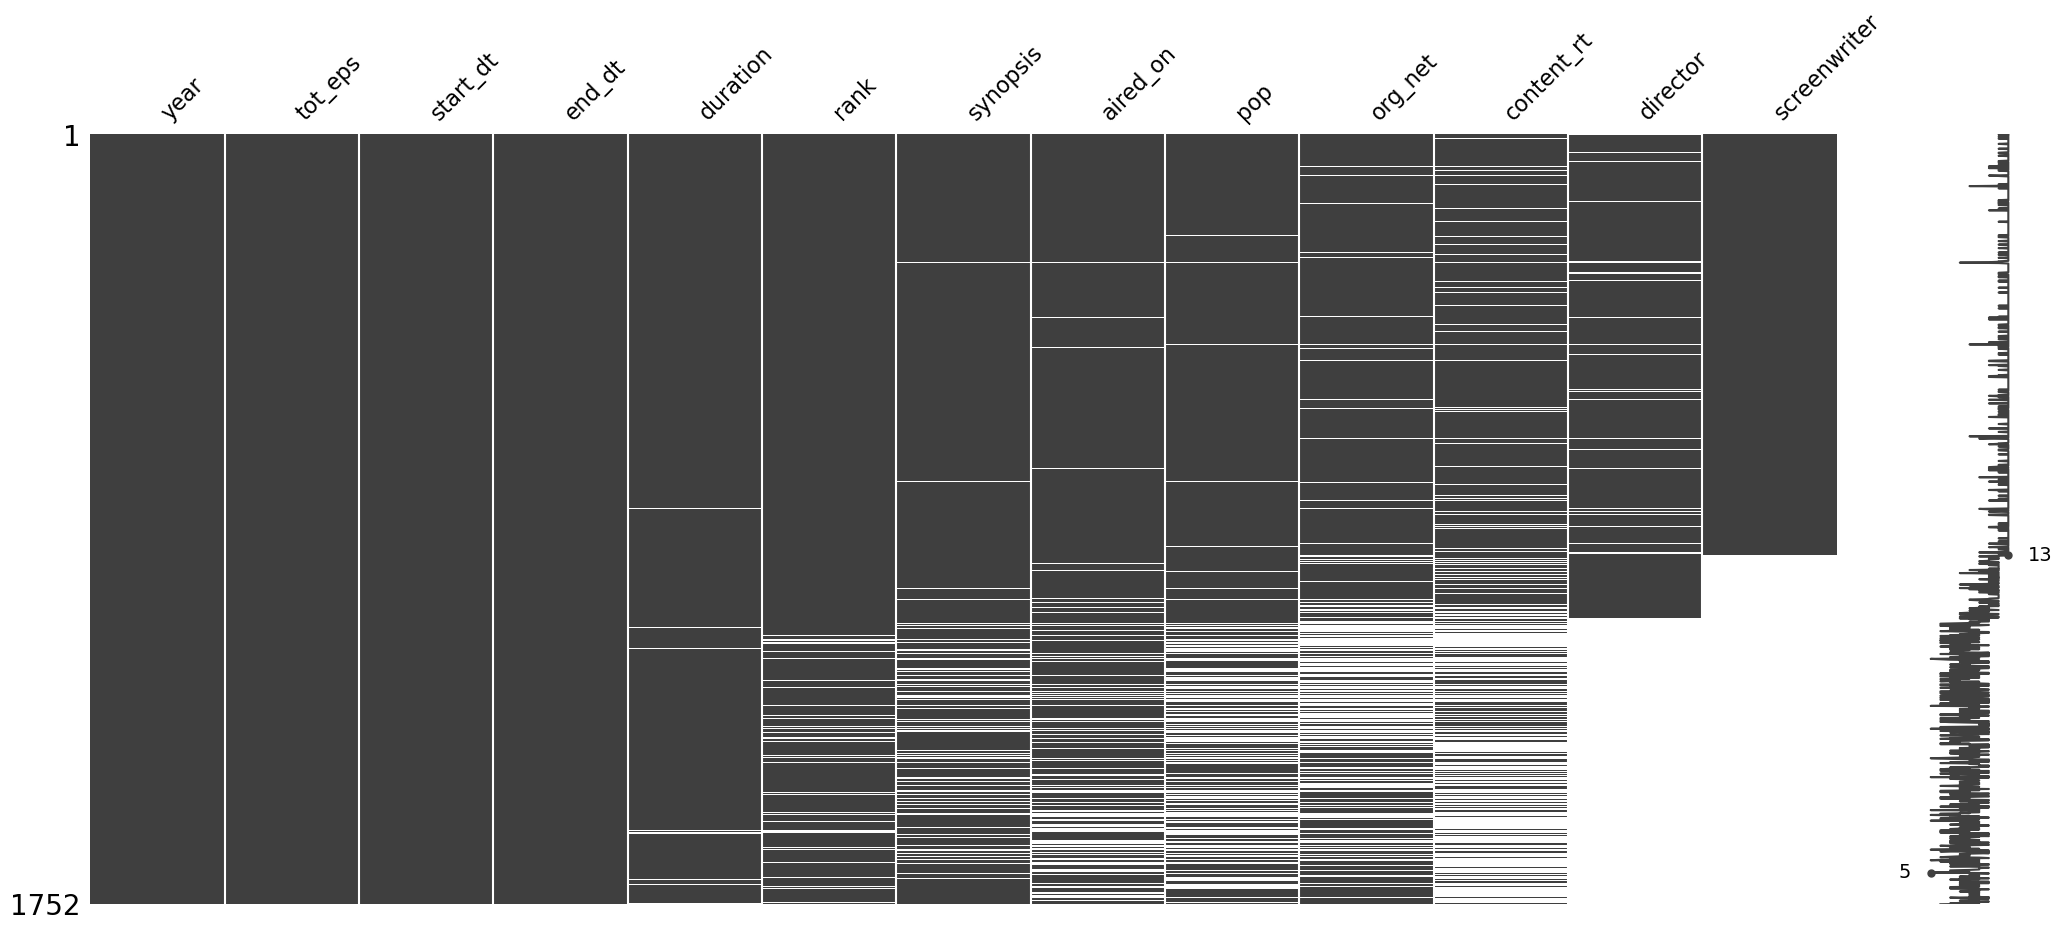

In [24]:
msno.matrix(df=k_dramas.missing_data.df_sorted_by_na_count().sort_values(by=["screenwriter", "director"], ascending=False))

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: xlabel='Intersection size'>}

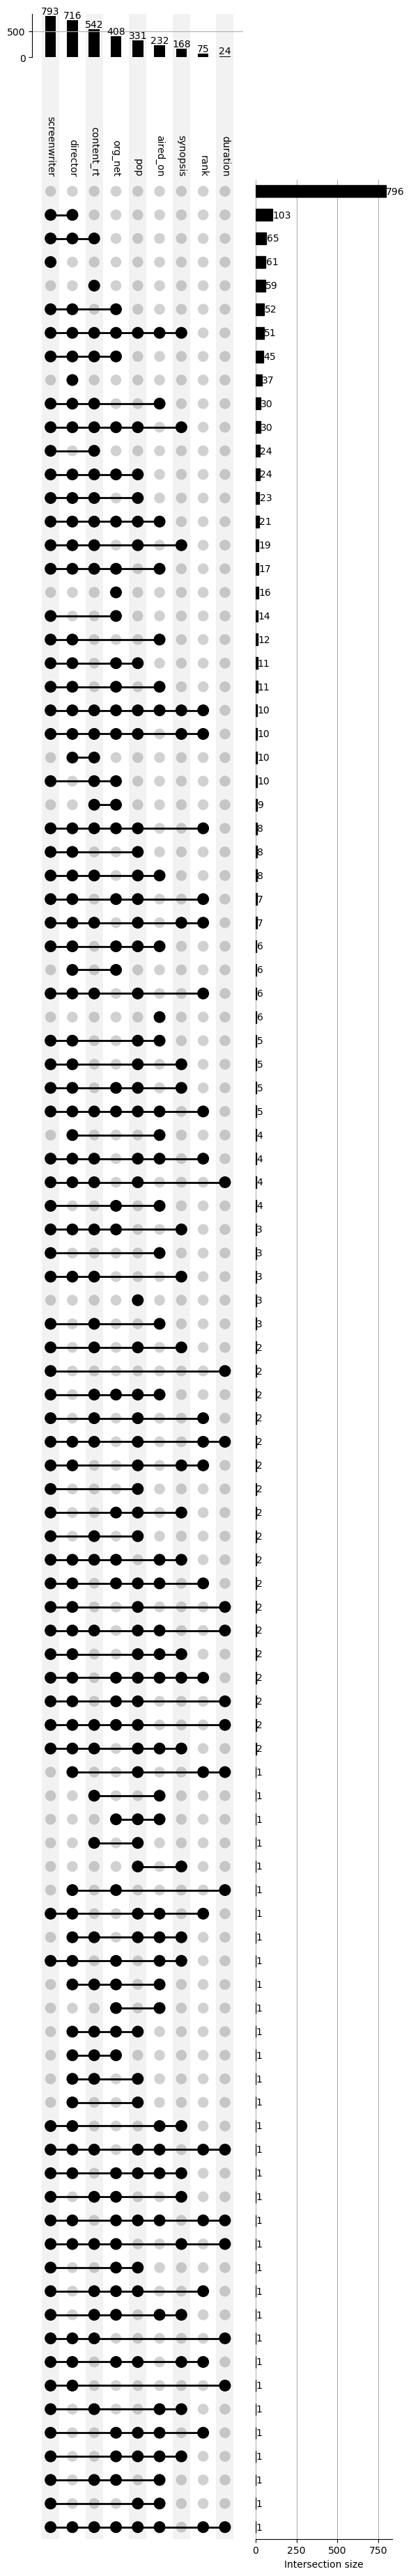

In [25]:
k_dramas.missing_data.upsetplot(
    orientation="vertical",
    sort_by="cardinality",
    show_counts=True,
)

In [26]:
k_dramas.missing_data.coincidence_count_na_per("column")

0      4
24     1
75     1
168    1
232    1
331    1
408    1
542    1
716    1
793    1
Name: count, dtype: int64

In [27]:
k_dramas.missing_data.coincidence_and_percentage_count_na_per("column")

,count,percentage
0,4,30.769231
24,1,7.692308
75,1,7.692308
168,1,7.692308
232,1,7.692308
331,1,7.692308
408,1,7.692308
542,1,7.692308
716,1,7.692308
793,1,7.692308


In [28]:
k_dramas.missing_data.columns_with_na

Index(['director', 'screenwriter', 'duration', 'aired_on', 'org_net',
       'content_rt', 'synopsis', 'rank', 'pop'],
      dtype='object')

In [29]:
k_dramas.missing_data.columns_without_na

Index(['year', 'tot_eps', 'start_dt', 'end_dt'], dtype='object')

In [30]:
k_dramas.shadow_matrix.df_with_shadow_matrix()

,year,director,screenwriter,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,...,pop,director_na,screenwriter_na,duration_na,aired_on_na,org_net_na,content_rt_na,synopsis_na,rank_na,pop_na
drama_name,,,,,,,,,,,,,,,,,,,,,
Sing My Crush,2023,['So Joon Moon'],NaN,8,1500.0,"Aug 2, 2023","Aug 2, 2023",Wednesday,NaN,NaN,...,2238.0,not_na,na,not_na,not_na,na,na,not_na,not_na,not_na
D.P. Season 2,2023,NaN,['Kim Bo Tong'],6,3000.0,"Jul 28, 2023","Jul 28, 2023",Friday,Netflix,15+ - Teens 15 or older,...,1084.0,na,not_na,not_na,not_na,not_na,not_na,not_na,not_na,not_na
Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",8,3300.0,2023-07-05,2023-07-26,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,...,6915.0,not_na,not_na,not_na,not_na,not_na,not_na,not_na,not_na,not_na
To Be Honest,2023,NaN,NaN,3,600.0,2023-06-30,2023-07-14,Friday,NaN,NaN,...,NaN,na,na,not_na,not_na,na,na,not_na,not_na,na
Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],12,2700.0,"Jun 30, 2023","Jun 30, 2023",Friday,Netflix,18+ Restricted (violence & profanity),...,547.0,not_na,not_na,not_na,not_na,not_na,not_na,not_na,not_na,not_na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Kill Me, Heal Me",2015,"['Kim Jin Man', 'Kim Dae Jin']",['Jin Soo Wan'],20,3720.0,2015-01-07,2015-03-12,"Wednesday, Thursday",MBC,15+ - Teens 15 or older,...,29.0,not_na,not_na,not_na,not_na,not_na,not_na,not_na,not_na,not_na
Enchanting Neighbor,2015,['Park Kyung Ryul'],['Park Hye Ryun'],120,2100.0,2015-01-05,2015-06-22,"Monday, Tuesday, Wednesday, Thursday, Friday",SBS,15+ - Teens 15 or older,...,10759.0,not_na,not_na,not_na,not_na,not_na,not_na,not_na,not_na,not_na
Iron Lady Cha,2015,"['Jang Joon Ho', 'Oh Hyun Chang']",['Seol Kyung Eun'],111,2400.0,2015-01-05,2015-06-12,"Monday, Tuesday, Wednesday, Thursday, Friday",MBC,15+ - Teens 15 or older,...,14841.0,not_na,not_na,not_na,not_na,not_na,not_na,not_na,not_na,not_na


In [31]:
k_dramas.shadow_matrix.describe_with_shadow_matrix("tot_eps", "duration")

,tot_eps,count,mean,std,min,25%,50%,75%,max
0,1,7.0,2854.285714,2356.571359,480.0,1110.0,2280.0,3900.0,7200.0
1,2,37.0,1365.405405,1770.446577,180.0,360.0,720.0,1320.0,9180.0
2,3,49.0,890.204082,1054.301684,240.0,480.0,600.0,780.0,6300.0
3,4,83.0,1197.831325,1148.763968,240.0,480.0,660.0,1200.0,4200.0
4,5,63.0,712.380952,375.859077,180.0,480.0,600.0,870.0,2520.0
...,...,...,...,...,...,...,...,...,...
72,130,1.0,2100.000000,NaN,2100.0,2100.0,2100.0,2100.0,2100.0
73,136,1.0,2400.000000,NaN,2400.0,2400.0,2400.0,2400.0,2400.0
74,143,1.0,2100.000000,NaN,2100.0,2100.0,2100.0,2100.0,2100.0
75,149,1.0,2100.000000,NaN,2100.0,2100.0,2100.0,2100.0,2100.0


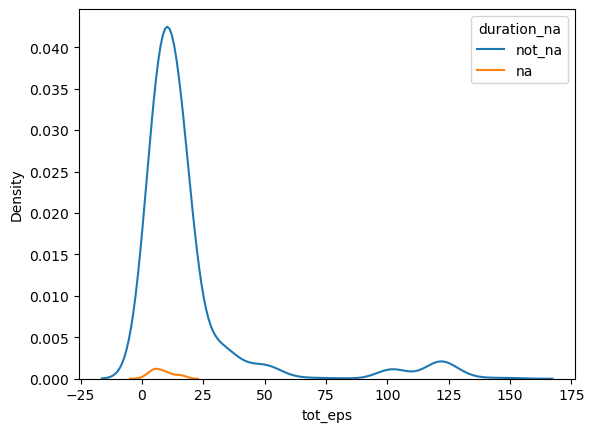

In [32]:
k_dramas.shadow_matrix.plot_with_shadow_matrix("tot_eps", "duration_na")

-----------

### Valores faltantes por fila

In [33]:
k_dramas.missing_data.count_na_per_row

drama_name
Sing My Crush                3
D.P. Season 2                1
Shadow Detective Season 2    0
To Be Honest                 5
Celebrity                    0
                            ..
Kill Me, Heal Me             0
Enchanting Neighbor          0
Iron Lady Cha                0
The Family Is Coming         0
Crow Building                7
Length: 1752, dtype: int64

In [34]:
k_dramas.missing_data.count_na_per_row_percentage

drama_name
Sing My Crush                23.076923
D.P. Season 2                 7.692308
Shadow Detective Season 2     0.000000
To Be Honest                 38.461538
Celebrity                     0.000000
                               ...    
Kill Me, Heal Me              0.000000
Enchanting Neighbor           0.000000
Iron Lady Cha                 0.000000
The Family Is Coming          0.000000
Crow Building                53.846154
Length: 1752, dtype: float64

In [35]:
k_dramas.missing_data.count_na_per_row.sort_values(ascending=False)

drama_name
Fool And Idiot                       8
Bamboo: 9pm, Please Tell My Story    8
Sweaty House                         8
My 100th Election                    8
LOVE up-date                         8
                                    ..
Rookie Cops                          0
The Last Empress                     0
Children of Nobody                   0
Top Star Yoo Baek                    0
I Wanna Hear Your Song               0
Length: 1752, dtype: int64

In [36]:
k_dramas.missing_data.count_na_per_row_percentage.sort_values(ascending=False)

drama_name
Fool And Idiot                       61.538462
Bamboo: 9pm, Please Tell My Story    61.538462
Sweaty House                         61.538462
My 100th Election                    61.538462
LOVE up-date                         61.538462
                                       ...    
Rookie Cops                           0.000000
The Last Empress                      0.000000
Children of Nobody                    0.000000
Top Star Yoo Baek                     0.000000
I Wanna Hear Your Song                0.000000
Length: 1752, dtype: float64

In [37]:
k_dramas.missing_data.na_count_and_percentage_per("row")

,count,percentage
drama_name,,
Sing My Crush,3,23.076923
D.P. Season 2,1,7.692308
Shadow Detective Season 2,0,0.000000
To Be Honest,5,38.461538
Celebrity,0,0.000000
...,...,...
"Kill Me, Heal Me",0,0.000000
Enchanting Neighbor,0,0.000000
Iron Lady Cha,0,0.000000


In [38]:
k_dramas.missing_data.na_count_and_percentage_per("row").sort_values(by="count", ascending=False)

,count,percentage
drama_name,,
Fool And Idiot,8,61.538462
"Bamboo: 9pm, Please Tell My Story",8,61.538462
Sweaty House,8,61.538462
My 100th Election,8,61.538462
LOVE up-date,8,61.538462
...,...,...
Rookie Cops,0,0.000000
The Last Empress,0,0.000000
Children of Nobody,0,0.000000


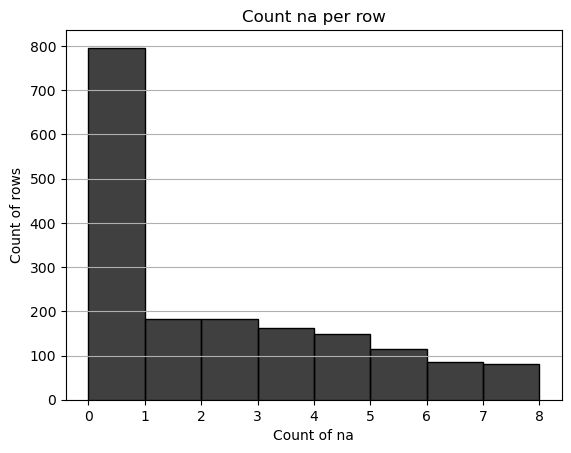

In [39]:
k_dramas.missing_data.histplot_of_na_count_per_row()

In [40]:
k_dramas.missing_data.coincidence_count_na_per("row")

0    796
1    182
2    182
3    163
4    149
5    114
6     85
7     70
8     11
Name: count, dtype: int64

In [41]:
k_dramas.missing_data.coincidence_and_percentage_count_na_per("row")

,count,percentage
0,796,45.433790
1,182,10.388128
2,182,10.388128
3,163,9.303653
4,149,8.504566
5,114,6.506849
6,85,4.851598
7,70,3.995434
8,11,0.627854


------

### Valores faltantes por intervalos

In [42]:
column = k_dramas.missing_data.columns_with_na[1]
column

'screenwriter'

In [43]:
interval = 10

In [44]:
k_dramas.missing_data.na_count_by_intervals(interval, column)

,count_of_na,count_of_not_na,percentage_of_na,percentage_of_not_na
groupby_number,,,,
0,4,6,40.0,60.0
1,6,4,60.0,40.0
2,3,7,30.0,70.0
3,3,7,30.0,70.0
4,2,8,20.0,80.0
...,...,...,...,...
171,3,7,30.0,70.0
172,2,8,20.0,80.0
173,4,6,40.0,60.0


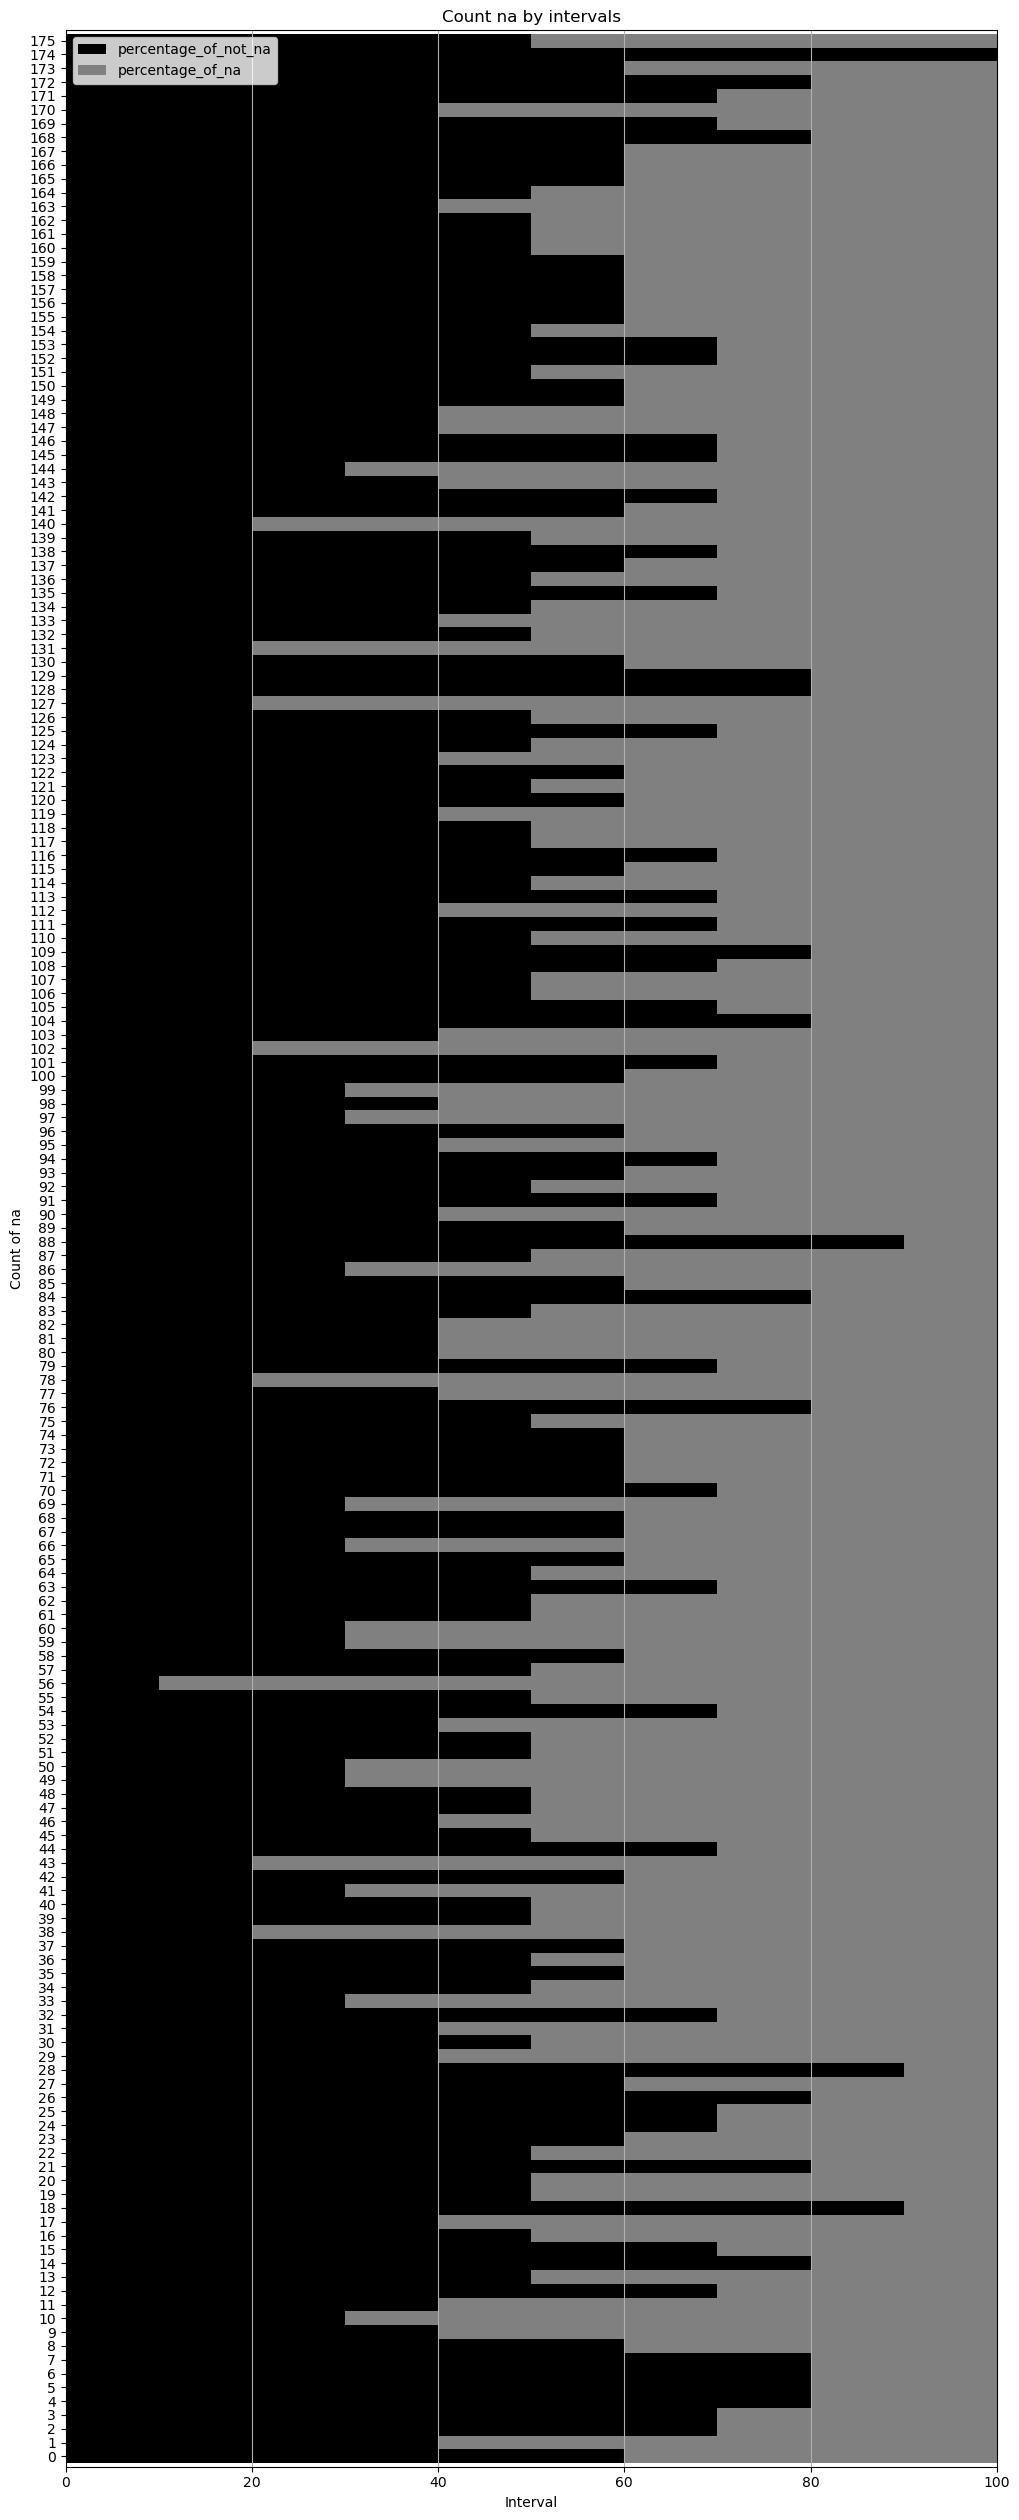

In [45]:
k_dramas.missing_data.percentage_of_not_na_vs_percentage_of_na_plot(interval, column, figsize=(10, 25))

In [46]:
k_dramas.missing_data.na_count_by_intervals(interval, column).sort_values(by="count_of_na", ascending=False)

,count_of_na,count_of_not_na,percentage_of_na,percentage_of_not_na
groupby_number,,,,
56,9,1,90.0,10.0
131,8,2,80.0,20.0
78,8,2,80.0,20.0
43,8,2,80.0,20.0
140,8,2,80.0,20.0
...,...,...,...,...
88,1,9,10.0,90.0
28,1,9,10.0,90.0
18,1,9,10.0,90.0


-----

In [47]:
bins = 30

In [48]:
k_dramas.missing_data.na_count_by_bins(bins, column)

,count_of_na,count_of_not_na,percentage_of_na,percentage_of_not_na
groupby_number,,,,
0,20,39,33.898305,66.101695
1,26,32,44.827586,55.172414
2,22,37,37.288136,62.711864
3,22,36,37.931034,62.068966
4,17,41,29.310345,70.689655
5,32,27,54.237288,45.762712
6,29,29,50.000000,50.000000
7,33,25,56.896552,43.103448
8,33,26,55.932203,44.067797


In [49]:
k_dramas.missing_data.na_count_by_bins(bins, column).sort_values(by="count_of_na", ascending=False)

,count_of_na,count_of_not_na,percentage_of_na,percentage_of_not_na
groupby_number,,,,
8,33,26,55.932203,44.067797
7,33,25,56.896552,43.103448
5,32,27,54.237288,45.762712
10,32,27,54.237288,45.762712
13,31,28,52.542373,47.457627
9,31,27,53.448276,46.551724
24,30,29,50.847458,49.152542
16,30,29,50.847458,49.152542
21,30,29,50.847458,49.152542


-----

In [50]:
k_dramas.missing_data.size_of_sections_of_na_and_not_na(column)

,num_in_section,value
0,1,na
1,2,not_na
2,1,na
3,1,not_na
4,1,na
...,...,...
820,1,na
821,1,not_na
822,2,na
823,12,not_na


In [51]:
k_dramas.missing_data.size_of_sections_of_na_and_not_na(column).sort_values(by="num_in_section", ascending=False)

,num_in_section,value
823,12,not_na
417,11,not_na
25,11,not_na
81,11,not_na
414,9,na
...,...,...
356,1,na
352,1,na
349,1,not_na
348,1,na


In [52]:
k_dramas.missing_data.size_of_sections_of_na_and_not_na(column).sort_values(by=["value", "num_in_section"], ascending=False)

,num_in_section,value
823,12,not_na
25,11,not_na
81,11,not_na
417,11,not_na
19,9,not_na
...,...,...
814,1,na
816,1,na
818,1,na
820,1,na
